In [1]:
import pandas as pd
import numpy as np
import pickle 
import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
model_df = pd.read_pickle("metal_for_modeling.pkl")

## Visualization -- Album release year

Let's start by plotting mean user review scores by album release year. MetalStorm.net was founded in the year 2000, meaning all reviews before that year were retrospective reviews.

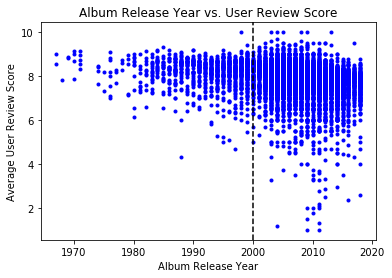

In [3]:
plt.plot(model_df['release_year'], model_df['user_review_score_num'], 'b.')
plt.title("Album Release Year vs. User Review Score")
plt.xlabel("Album Release Year")
plt.ylabel("Average User Review Score")
plt.axvline(2000, color='k', linestyle='--', label='Metal Storm founded in 2000')
plt.show()

It does look like the distribution is different for user review scores for albums released before and after the site's founding.

Before we plot the distribution for 2000 and later only, let's look at the outlier in the retrospective reviews that got a score around 4 and was released in the late 80s.

In [4]:
albumyear_outlier = model_df.loc[(model_df['user_review_score_num'] < 5.0) & (model_df['release_year'] < 1990)]
albumyear_outlier.head()

,band,album,num_songs,release_year,review_score_num,user_review_num,user_review_score_num,album_metalness_sum,album_metalness_mean,album_metalness_sum_div_len2,songtitle_metalness_sum,songtitle_metalness_mean,songtitle_metalness_sum_div_len2,bandname_metalness_sum,bandname_metalness_mean,bandname_metalness_sum_div_len2
12520,Celtic Frost,Cold Lake,13.0,1988.0,6.0,158.0,4.31,2.336037,1.168019,1.557358,7.343153,0.489544,0.917894,1.904538,0.952269,1.269692


Well that makes sense -- a classic extreme metal band went glam for one album with an almost entirely new lineup. Go ahead and google this album if you're curious -- there are a lot of hot takes on it out there.

Onward to 2000 and beyond:

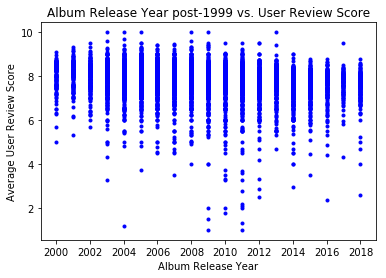

In [5]:
model_df1 = model_df.dropna(subset = ['user_review_score_num'])
model_df2 = model_df1.loc[model_df1['release_year'] > 1999]

plt.plot(model_df2['release_year'], model_df2['user_review_score_num'], 'b.')
plt.title("Album Release Year post-1999 vs. User Review Score")
plt.xlabel("Album Release Year")
plt.ylabel("Average User Review Score")
plt.xticks([2000,2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
#plt.axvline(2000, color='k', linestyle='--', label='Metal Storm founded in 2000')
plt.show()

That looks pretty unpredictable. The R-squared for the linear regression using only album release year as a predictor variable was .054 -- quite low already -- but let's run the regression again using only this time frame:

In [6]:
X = model_df2[['release_year']]

y = model_df2['user_review_score_num']

Xa = sm.add_constant(X)
est = sm.OLS(y, Xa)
results = est.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     user_review_score_num   R-squared:                       0.033
Model:                               OLS   Adj. R-squared:                  0.033
Method:                    Least Squares   F-statistic:                     219.7
Date:                   Mon, 15 Oct 2018   Prob (F-statistic):           6.63e-49
Time:                           22:31:26   Log-Likelihood:                -7630.9
No. Observations:                   6415   AIC:                         1.527e+04
Df Residuals:                       6413   BIC:                         1.528e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73

So there's still some very slight effect where albums from earlier years get slightly better ratings, even from 2000 forward. We don't know, however, if this is because they were easier raters during the site's early days or if they did some retrospective reviewing of previously overlooked albums post-2000. Or if metal just wasn't as good after Y2K.

## Visualization -- Number of user reviews

Let's plot the number of user reviews agains the average user review score:

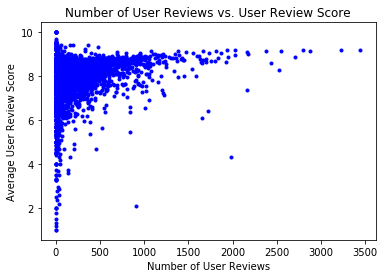

In [7]:
plt.plot(model_df['user_review_num'], model_df['user_review_score_num'], 'b.')
plt.title("Number of User Reviews vs. User Review Score")
plt.xlabel("Number of User Reviews")
plt.ylabel("Average User Review Score")
plt.show()

Not too surprising that albums with more user reviews tend to have higher scores -- but what are those two outliers with review scores under 5 but with hundreds of user reviews?

In [8]:
usercount_outliers = model_df.loc[(model_df['user_review_score_num'] < 5.0) & (model_df['user_review_num'] > 800)]
usercount_outliers.head()

,band,album,num_songs,release_year,review_score_num,user_review_num,user_review_score_num,album_metalness_sum,album_metalness_mean,album_metalness_sum_div_len2,songtitle_metalness_sum,songtitle_metalness_mean,songtitle_metalness_sum_div_len2,bandname_metalness_sum,bandname_metalness_mean,bandname_metalness_sum_div_len2
366,Metallica,St. Anger,11.0,2003.0,5.0,1981.0,4.32,1.687563,1.687563,1.687563,14.623860,1.044561,1.949848,0.0,0.0,0.0
9825,Metallica,Lulu [Collaboration],6.0,2011.0,2.0,906.0,2.09,0.000000,0.000000,0.000000,7.690464,1.281744,2.197275,0.0,0.0,0.0


Oh. Yeah. Those make sense.

Let's look at the distribution of average review scores (generally on the higher end of the 10-point scale) and the number of user reviews (mostly quite low).

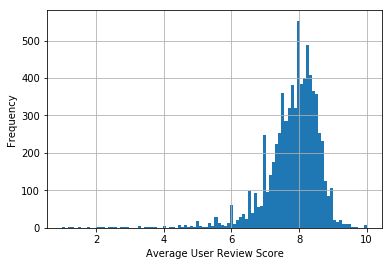

In [9]:
ax = model_df['user_review_score_num'].hist(bins=100)
ax.set_xlabel("Average User Review Score")
ax.set_ylabel("Frequency")
ax

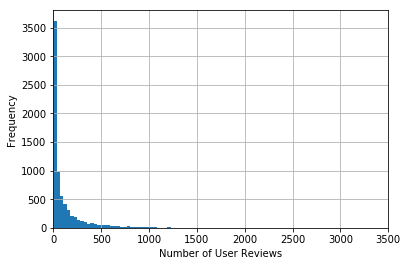

In [10]:
ax = model_df['user_review_num'].hist(bins=100, range=[0,3500])
ax.set_xlabel("Number of User Reviews")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 3500)
ax

What did we learn? MetalStorm.net went back to review a bunch of classic albums (plus one controversial glam turn) after its founding, and otherwise album review year doesn't much affect ratings, and users are more likely to review albums with high ratings (except when they are hate-rating Metallica).